In [10]:
import pdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
import pickle as pkl
import glob
import pdb
import os
pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/users/cornkle/pythonWorkspace/proj_CEH


In [24]:
tas_hist_dir = '/home/users/cornkle/linked_CP4/hist/t_pl/'
tas_fut_dir = '/home/users/cornkle/linked_CP4/future/t_pl/'

In [25]:
tas_hist_files = glob.glob(tas_hist_dir + '*.nc')
tas_fut_files = glob.glob(tas_fut_dir + '*.nc')

In [49]:
tags = ['CP4hist', 'CP4fut']
var = 'f30204'  # t_pl

temps = {'CP4hist' : [], 'CP4fut' : []}

for idx, dats in enumerate([tas_hist_files, tas_fut_files]):
    u_dates = []
    for idp, sf in enumerate(dats):  ########restricted files for testing
        fname = os.path.basename(sf).split('_')[-1]
        u_date = fname[0:4]+fname[4:6]+fname[6:8]

        if int(fname[4:6]) not in [8]:
            continue
        if int(fname[6:8]) not in [10,20]:
            continue

        print('Doing', u_date)

        sda = xr.open_dataset(sf)
        sda = sda.assign_coords(longitude=sda.longitude.values-360)
        sda = sda[var].sel(time=(sda['time.hour']==12), latitude=slice(8,15), longitude=slice(-10,10))
        sda = sda.where((sda.values!=0), other=np.nan)
        
        tmean = sda.mean(['latitude','longitude'])

        temps[tags[idx]].append(tmean)

Doing 19980810
Doing 19980820
Doing 19990810
Doing 19990820
Doing 20000810
Doing 20000820
Doing 20010810
Doing 20010820
Doing 20020810
Doing 20020820
Doing 20030810
Doing 20030820
Doing 19970810
Doing 19970820
Doing 20040810
Doing 20040820
Doing 20050810
Doing 20050820
Doing 20060810
Doing 20060820
Doing 20020810
Doing 20020820
Doing 20030810
Doing 20030820
Doing 20040810
Doing 20040820
Doing 20050810
Doing 20050820
Doing 20060810
Doing 20060820
Doing 19970810
Doing 19970820
Doing 19980810
Doing 19980820
Doing 19990810
Doing 19990820
Doing 20000810
Doing 20000820
Doing 20010810
Doing 20010820


In [50]:
cp4hist_temp = xr.concat(temps['CP4hist'], dim='time')

In [51]:
cp4fut_temp = xr.concat(temps['CP4fut'], dim='time')

In [52]:
cp4fut_temp.pressure

<xarray.DataArray 'pressure' (pressure: 18)>
array([ 100.,  200.,  300.,  350.,  400.,  450.,  500.,  550.,  600.,  650.,
        700.,  750.,  800.,  850.,  900.,  925.,  950., 1000.], dtype=float32)
Coordinates:
  * pressure                 (pressure) float32 100.0 200.0 ... 950.0 1e+03
    forecast_reference_time  object 1997-01-01 00:00:00
Attributes:
    axis:       Z
    units:      hPa
    long_name:  pressure

In [53]:
cp4hist_temp.pressure

<xarray.DataArray 'pressure' (pressure: 19)>
array([  60.,  100.,  200.,  300.,  350.,  400.,  450.,  500.,  550.,  600.,
        650.,  700.,  750.,  800.,  850.,  900.,  925.,  950., 1000.])
Coordinates:
  * pressure  (pressure) float64 60.0 100.0 200.0 300.0 ... 925.0 950.0 1e+03
Attributes:
    axis:       Z
    units:      hPa
    long_name:  pressure

In [54]:
cp4hist_temp

<xarray.DataArray 'f30204' (time: 20, pressure: 19)>
array([[205.05057, 198.61305, 220.4751 , 242.87596, 250.97124, 257.71918,
        263.20645, 267.58157, 271.10144,       nan, 278.664  , 282.4014 ,
        285.87033, 289.01   , 291.83038, 294.43857, 296.12967, 298.13165,
        298.88544],
       [205.79413, 198.9287 , 220.03809, 242.53404, 250.90605, 257.83447,
        263.36963, 267.63635, 270.9017 ,       nan, 278.4779 , 282.227  ,
        285.70297, 288.7403 , 291.391  , 294.29755, 296.16547, 298.2906 ,
        301.25754],
       [206.80557, 198.42226, 219.07812, 241.66367, 250.01273, 256.63202,
        261.88266, 266.2146 , 269.90005,       nan, 278.94995, 283.30078,
        287.09354, 290.1631 , 291.94803, 294.6955 , 296.67398, 298.7387 ,
        300.2824 ],
       [206.6335 , 198.0252 , 219.6831 , 242.21135, 250.42316, 256.95282,
        262.32837, 266.60455, 270.25992,       nan, 278.34515, 282.27417,
        285.68167, 288.48648, 290.8322 , 293.377  , 294.8908 , 296.6328 ,
        298.53534],
       [      nan, 198.75504, 219.42078, 241.77922, 250.12117, 256.8845 ,
        262.12552, 266.11328, 269.5702 , 273.86264, 278.7722 , 283.30402,
        287.0855 , 289.93967, 292.06036, 294.31573, 296.26807, 298.42267,
        299.94418],
...
       [      nan, 198.77222, 220.24149, 242.44153, 250.6436 , 257.42407,
        262.86786, 267.16403, 270.60587, 274.57745, 278.8503 , 282.9896 ,
        286.69604, 289.62335, 292.0935 , 295.03638, 296.9104 , 298.99866,
        300.0641 ],
       [      nan, 199.93015, 220.39651, 243.07101, 251.28525, 257.8532 ,
        263.04407, 267.29706, 271.0809 , 274.90475, 279.18155, 283.05365,
        286.47772, 289.35812, 291.64594, 294.23657, 295.92944, 297.75394,
        298.9103 ],
       [      nan, 198.52774, 220.19304, 242.07556, 250.09242, 256.45428,
        261.57642, 266.0426 , 269.95773, 274.83255, 279.9299 , 284.49994,
        288.42673, 291.09396, 292.65778, 295.55374, 297.63672, 299.83163,
        302.39746],
       [      nan, 200.03185, 220.20139, 242.65015, 250.90054, 257.64325,
        262.9402 , 267.2934 , 270.91763, 274.4011 , 278.14838, 281.80728,
        285.06873, 288.02222, 290.752  , 293.5108 , 295.24814, 297.19205,
        298.66132],
       [      nan, 197.6908 , 220.54024, 242.87622, 251.02888, 257.85086,
        263.42007, 267.6605 , 271.07294, 274.92035, 279.1805 , 283.16672,
        286.5216 , 288.74857, 290.84296, 293.57205, 295.42   , 297.39935,
        300.84512]], dtype=float32)
Coordinates:
  * pressure                 (pressure) float64 60.0 100.0 200.0 ... 950.0 1e+03
  * time                     (time) object 1998-08-10 12:00:00 ... 2006-08-20...
    forecast_period          (time) timedelta64[ns] 399 days 12:00:00 ... 949...
    forecast_reference_time  (time) object 1997-07-01 00:00:00 ... 2004-01-01...

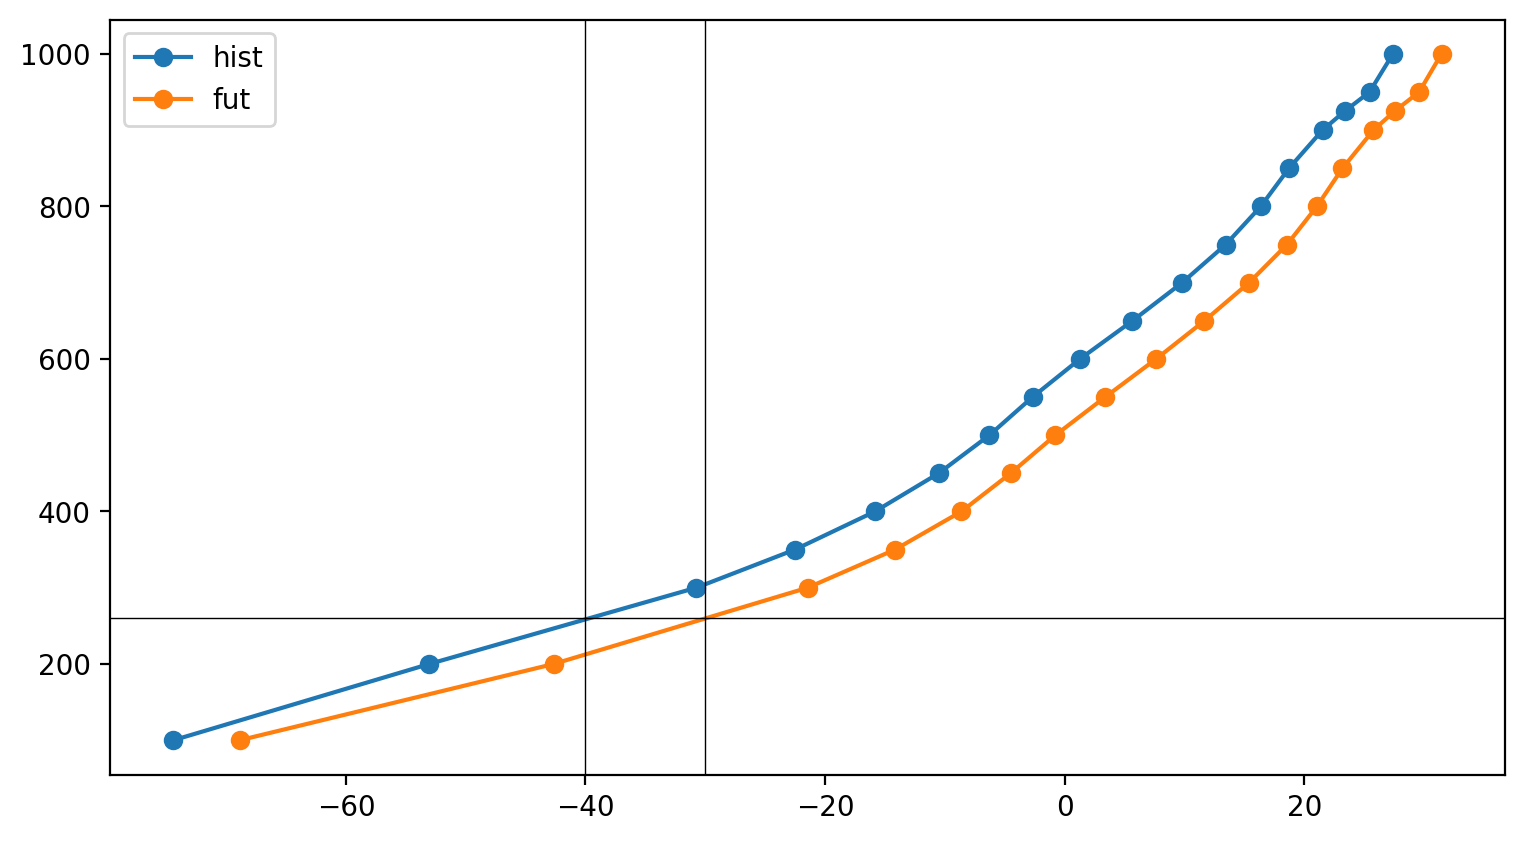

In [72]:
f = plt.figure(figsize=(9,5), dpi=200)
ax = f.add_subplot(111)
plt.plot(((cp4hist_temp.mean('time')-273.15)[1::]).T, cp4fut_temp.pressure.T, label='hist', marker='o')
plt.plot(cp4fut_temp.mean('time').T-273.15, cp4fut_temp.pressure.T, label='fut', marker='o')
plt.legend()
ax.axvline(-40, color='k', linewidth=0.5)
ax.axhline(260, color='k', linewidth=0.5)
ax.axvline(-30, color='k', linewidth=0.5)

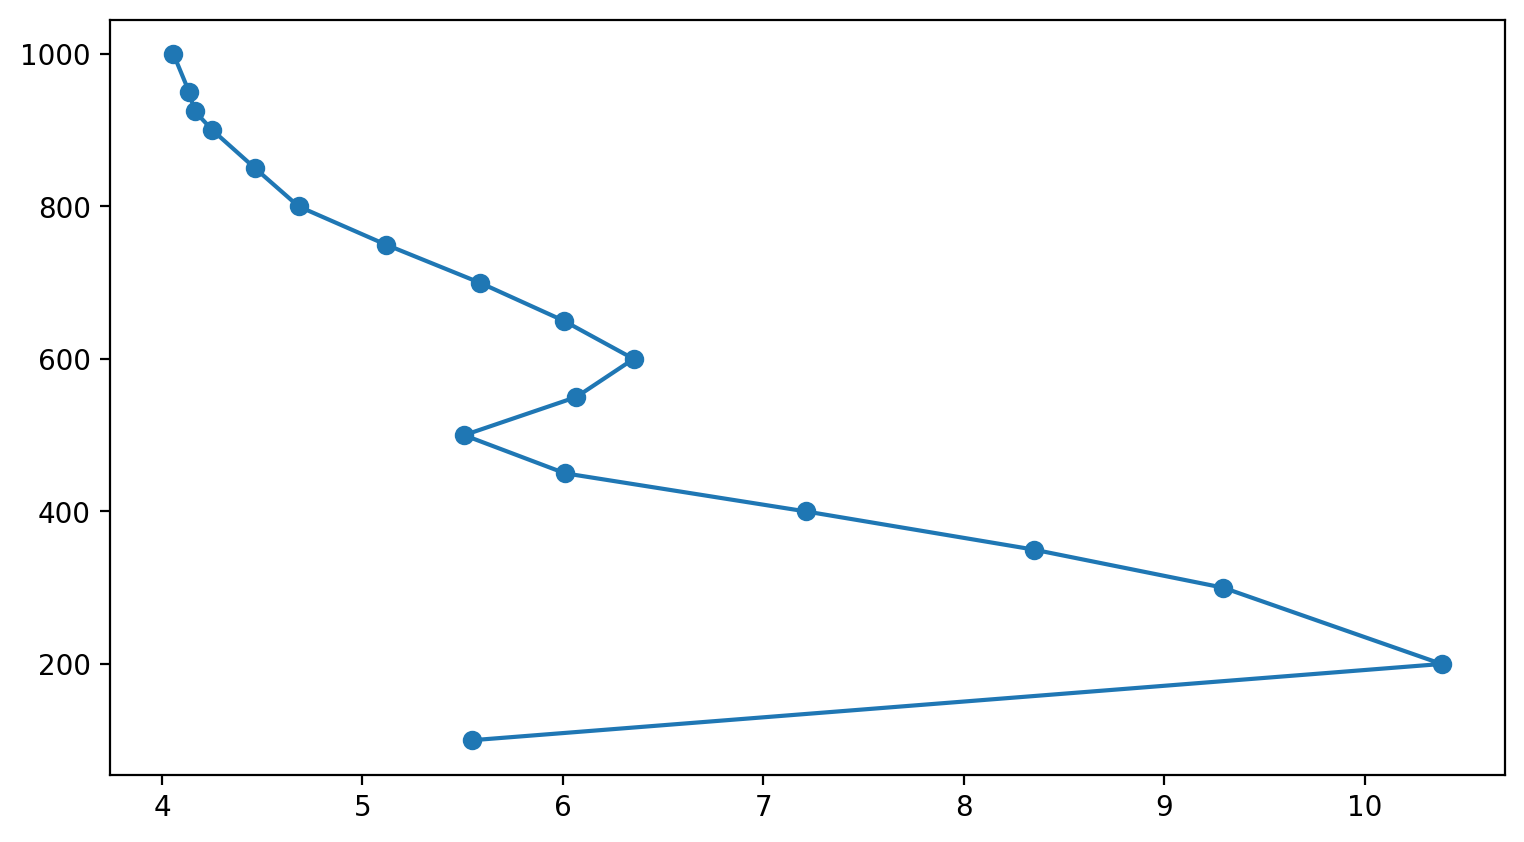

In [73]:
f = plt.figure(figsize=(9,5), dpi=200)
ax = f.add_subplot(111)
plt.plot((cp4fut_temp.mean('time').T-273.15)-((cp4hist_temp.mean('time')-273.15)[1::]).T, cp4fut_temp.pressure.T, label='hist', marker='o')
#plt.plot(cp4fut_temp.mean('time').T-273.15, cp4fut_temp.pressure.T, label='fut', marker='o')
#plt.legend()
#ax.axvline(-40, color='k', linewidth=0.5)
#ax.axhline(260, color='k', linewidth=0.5)
#ax.axvline(-30, color='k', linewidth=0.5)